In [1]:
import pandas as pd

df = pd.read_csv('data/banijay_op1data_content_ratings.csv', compression='zip')

In [2]:
import numpy as np

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893310 entries, 0 to 893309
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0.3     893310 non-null  int64  
 1   Unnamed: 0.2     893310 non-null  int64  
 2   Unnamed: 0.1     893310 non-null  int64  
 3   Unnamed: 0       893310 non-null  int64  
 4   date             893310 non-null  object 
 5   hosts            893310 non-null  object 
 6   id               893310 non-null  object 
 7   length           893310 non-null  object 
 8   start            893310 non-null  object 
 9   end              893310 non-null  object 
 10  title            893310 non-null  object 
 11  summary          893310 non-null  object 
 12  keywords         893310 non-null  object 
 13  date_time_start  893310 non-null  object 
 14  date_time_end    893310 non-null  object 
 15  content_id       893310 non-null  object 
 16  fragment         893310 non-null  int6

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
df["title"].unique()

array(['Tom Middendorp about the military convoy to Kiev',
       "Raymond Mens on Biden's first State of the Union",
       'Anne Kuik, Marijke Smelt and Arjan Lock about the fleeing Ukrainians',
       ..., 'Op1 - The opening of Wednesday, August 31',
       'Sjaak van der Tak, Annemarie van Gaal and Peter Kee about the purchasing power agreement and the negotiations with Remkes',
       'Tim Knol and Nico Dijkshoorn about their album and book'],
      dtype=object)

The average rating: 286.7136092383791


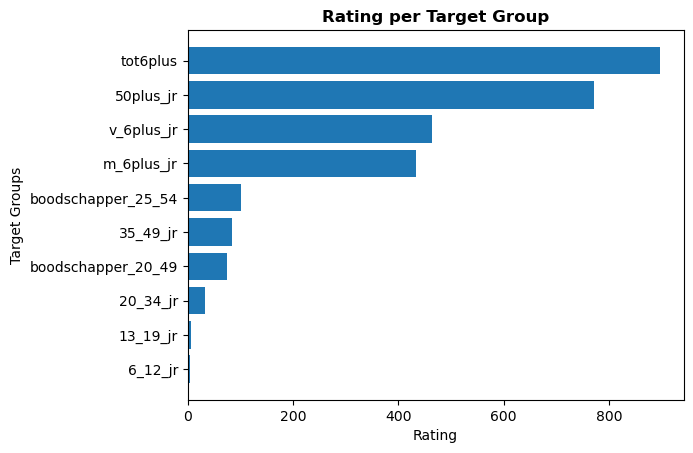

In [6]:
Rating_types_total = df.loc[df["Ratings Type"] == "totaal"]

print("The average rating:", Rating_types_total["Kdh000"].mean())
average_rating_per_group = Rating_types_total.groupby("Target Group", as_index=False)["Kdh000"].mean().sort_values('Kdh000', ascending=True)

fig, ax = plt.subplots()
ax.barh(average_rating_per_group['Target Group'], average_rating_per_group['Kdh000'])
ax.set_title('Rating per Target Group', fontdict={'fontweight':'bold'})
ax.set_xlabel('Rating')
ax.set_ylabel('Target Groups')
plt.savefig('Visualizations/Rating_per_Target_Group.png', dpi=400)
plt.show()

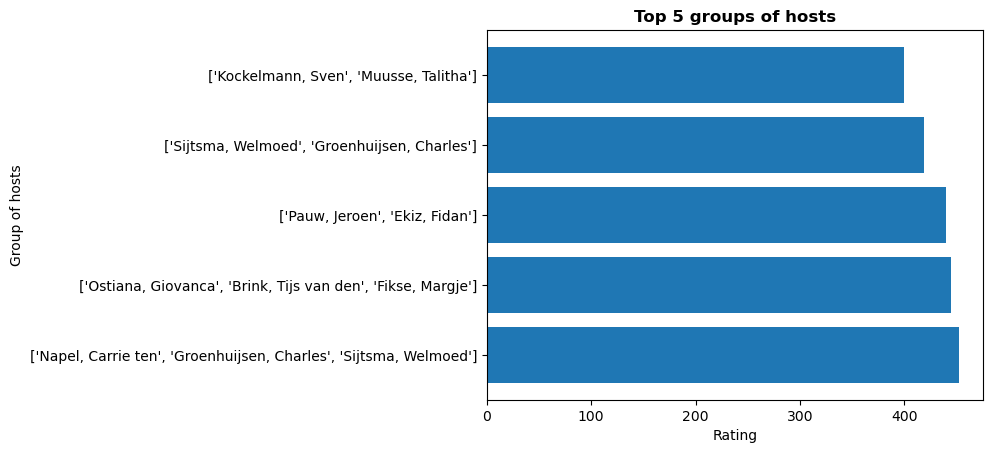

In [7]:
hosts_ratings = Rating_types_total.groupby('hosts', as_index=False)["Kdh000"].mean()
top_5_hosts = hosts_ratings.sort_values('Kdh000', ascending=False).head(5)
fragments_rating = Rating_types_total.groupby(['content_id', 'fragment', 'keywords'], as_index=False)["Kdh000"].mean()
fragments_top_5 = fragments_rating.sort_values('Kdh000', ascending=False).head(5)
plt.barh(top_5_hosts['hosts'], top_5_hosts['Kdh000'])
plt.title('Top 5 groups of hosts', fontdict={'fontweight':'bold'})
plt.ylabel('Group of hosts')
plt.xlabel('Rating')
plt.savefig('Visualizations/Top_5_groups_of_hosts.png', dpi=400)

Text(0, 0.5, 'Rating')

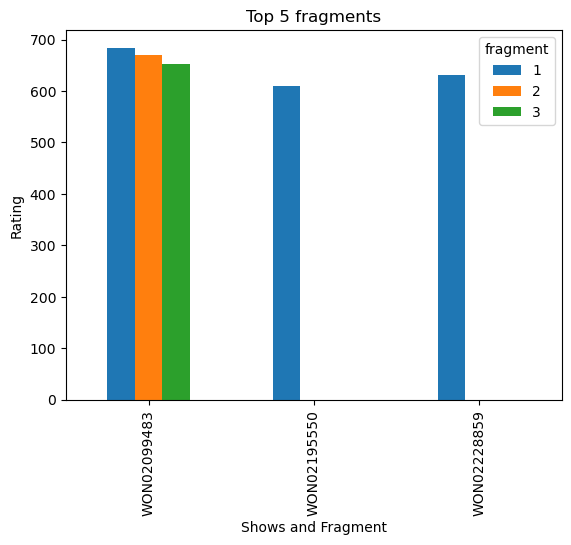

In [8]:
df_pivot = pd.pivot_table(fragments_top_5, values="Kdh000", index="content_id", columns="fragment", aggfunc=np.mean)
ax = df_pivot.plot(kind="bar")

ax.set_title('Top 5 fragments')
ax.set_xlabel('Shows and Fragment')
ax.set_ylabel('Rating')

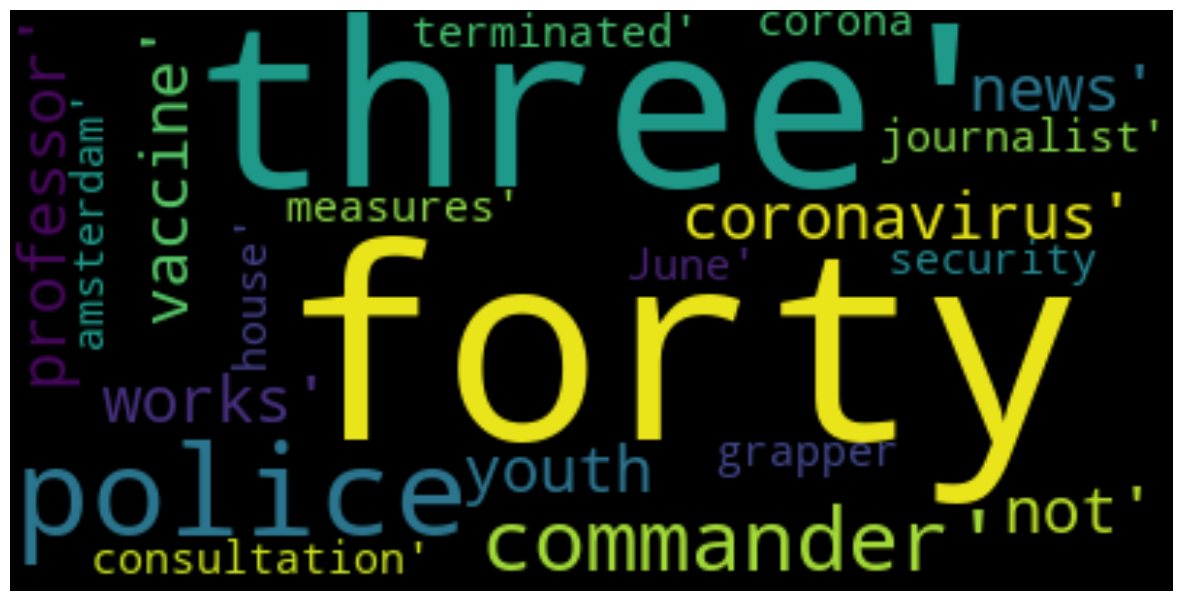

In [9]:
# It creates wordcloud with top 5 keywords based on shows and fragments 
text = " ".join(i for i in fragments_top_5["keywords"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('Visualizations/wordcloud_keywords.png')

In [10]:
# Extract month and day of the week
Rating_types_total["Datum"] = pd.to_datetime(Rating_types_total["Datum"], format='%Y-%m-%d %H:%M:%S')
Rating_types_total["month"] = Rating_types_total["Datum"].dt.month 
Rating_types_total["day_of_week"] = Rating_types_total["Datum"].dt.weekday

# Categorize by month and day of the week
average_rating_per_month = Rating_types_total.groupby("month")["Kdh000"].mean()
average_rating_per_weekday = Rating_types_total.groupby("day_of_week")["Kdh000"].mean()

# Categorize by month and day of the week, but only for Target Group tot6plus
total_target_group = Rating_types_total.loc[Rating_types_total["Target Group"] == "tot6plus"]
average_rating_per_month_target_group = total_target_group.groupby("month")["Kdh000"].mean()
average_rating_per_day_of_week_target_group = total_target_group.groupby("day_of_week")["Kdh000"].mean()

C:\Users\mened\AppData\Local\Temp\ipykernel_12444\1688216370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rating_types_total["Datum"] = pd.to_datetime(Rating_types_total["Datum"], format='%Y-%m-%d %H:%M:%S')
C:\Users\mened\AppData\Local\Temp\ipykernel_12444\1688216370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rating_types_total["month"] = Rating_types_total["Datum"].dt.month
C:\Users\mened\AppData\Local\Temp\ipykernel_12444\1688216370.py:4: SettingWithCopyWarning: 
A value is trying to be s

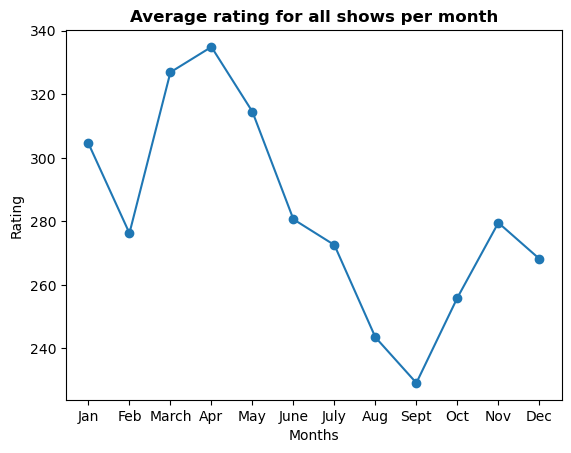

In [11]:
months = ["Jan", "Feb", "March", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
plt.title("Average rating for all shows per month", fontdict={'fontweight':'bold'})
plt.plot(months, average_rating_per_month, marker='o')
plt.xlabel("Months")
plt.ylabel("Rating")
plt.savefig('Visualizations/Average_rating_for_all_shows_per_month.png', dpi=300)

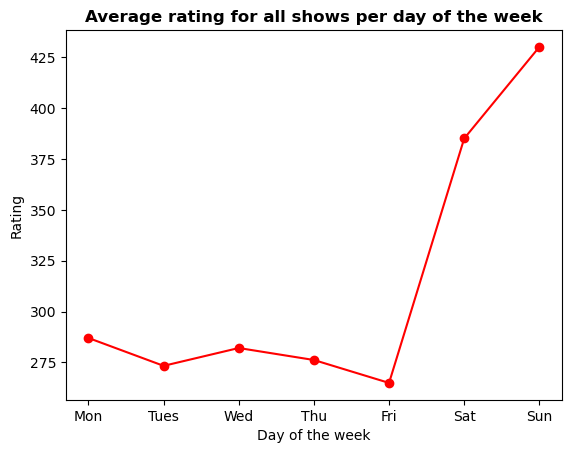

In [12]:
day_of_the_week = ["Mon", "Tues", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.title("Average rating for all shows per day of the week", fontdict={'fontweight':'bold'})
plt.plot(day_of_the_week, average_rating_per_weekday, color='r', marker='o')
plt.xlabel("Day of the week")
plt.ylabel("Rating")
plt.savefig('Visualizations/Average_rating_for_all_shows_per_day_of_the_week.png', dpi=300)

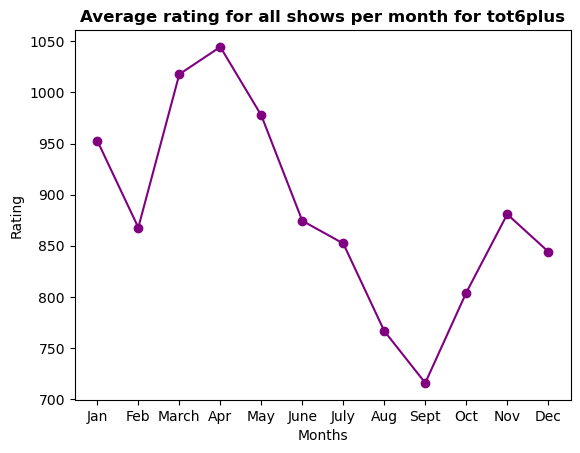

In [13]:
plt.title("Average rating for all shows per month for tot6plus", fontdict={'fontweight':'bold'})
plt.plot(months, average_rating_per_month_target_group, color='purple', marker='o')
plt.xlabel("Months")
plt.ylabel("Rating")
plt.savefig('Visualizations/Average_rating_for_all_shows_per_month_for_tot6plus.png', dpi=300)

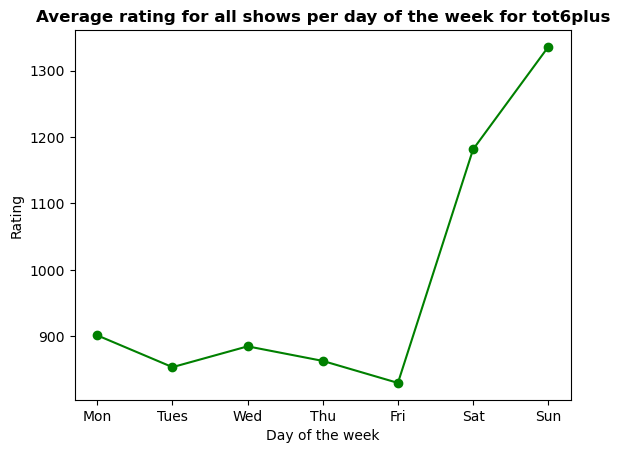

In [14]:
plt.title("Average rating for all shows per day of the week for tot6plus", fontdict={'fontweight':'bold'})
plt.plot(day_of_the_week, average_rating_per_day_of_week_target_group, color='g', marker='o')
plt.xlabel("Day of the week")
plt.ylabel("Rating")
plt.savefig('Visualizations/Average_rating_for_all_shows_per_day_of_the_week_for_tot6plus.png', dpi=300)